# Let's predict the level of diabetes

## Overall
In this notebook, I'm going to use scikit-learn's diabetic patient dataset to predict diabetes levels.

## Input Data

**Task summary**

1. Import the already provided data from the scikit-learn library.
2. Classify dataset into data and taget, and save them.
3. Convert each one to NumPy.

In [1]:
import numpy as np

In [2]:
# Task 1-1: get data from sklean
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

# Task 1-2: create two values; df_X, df_y for data, target, respectively.
# To get some attribute such as 'data' or 'target', I just need to use '.(dot)'
# Using .(dot), you can access the data and the target as well.
df_X = diabetes.data
df_y = diabetes.target

# Let's check the variables
df_X, df_y

(array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990842, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06832974, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286377, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04687948,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452837, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00421986,  0.00306441]]),
 array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
   

In [3]:
# Task 2: change df_X to np.array

# I tried to check the type of "df_X"
# But it is already np.ndarray.
print(type(df_X)) 

# So I just made a variable.
X = df_X

<class 'numpy.ndarray'>


In [4]:
# Task 3: change df_y to np.array

# I tried to check the type of "df_y"
# But it is already np.ndarray. Again...
print(type(df_y)) 

# So I just made a variable.
y = df_y

<class 'numpy.ndarray'>


In [5]:
# Task 4: split train data and test data
# To split datasets, I need to use the function called "train_test_split"
from sklearn.model_selection import train_test_split

# To clean the code, I use bracket, but it is no problem for the code.
# It is one of the code convention for some companies. :)
X_train, X_test, y_train, y_test = (
    train_test_split(X, y, test_size=0.2, random_state=42)
)
# About test_size=0.2 and random_state, I just follow sample code.
# Because I mostly used that proportion.


# Okay, let's check the result.
X_train[0:4], X_test[0:4], y_train[0:4], y_test[0:4]

(array([[ 0.07076875,  0.05068012,  0.01211685,  0.05630106,  0.03420581,
          0.04941617, -0.03971921,  0.03430886,  0.02736771, -0.0010777 ],
        [-0.00914709,  0.05068012, -0.01806189, -0.03321358, -0.0208323 ,
          0.01215151, -0.07285395,  0.07120998,  0.00027149,  0.01963284],
        [ 0.00538306, -0.04464164,  0.04984027,  0.09761551, -0.01532849,
         -0.016345  , -0.00658447, -0.00259226,  0.01703713, -0.01350402],
        [-0.02730979, -0.04464164, -0.03530688, -0.02977071, -0.05660707,
         -0.05862005,  0.03023191, -0.03949338, -0.04986847, -0.12948301]]),
 array([[ 0.04534098, -0.04464164, -0.00620595, -0.01599922,  0.1250187 ,
          0.1251981 ,  0.019187  ,  0.03430886,  0.03243323, -0.0052198 ],
        [ 0.09256398, -0.04464164,  0.03690653,  0.02187235, -0.02496016,
         -0.01665815,  0.00077881, -0.03949338, -0.02251217, -0.02178823],
        [ 0.06350368,  0.05068012, -0.00405033, -0.01255635,  0.10300346,
          0.04878988,  0.05600

## Prepare the model

**Task summary**

1. Create linear regression model, and implement it
2. Define the loss function
3. Implementation the gradient function
4. Setup the hyper parameters

In [6]:
# Task 5: prepare the model

# I define the simple line function.
# Because X was a matrix, so I tried to use 'dot()'.
# W.shape will be (1, 10)
def model(X, W, b):
    y = np.dot(W, X.T) + b
    return y

In [7]:
# Task 6: define the loss function

# I just define MSE using the reference page: 
# Regression Model Accuracy (MAE, MSE, RMSE, R-squared) Check in R.

def MSE(a, b):
    return ((a - b) ** 2).mean() # Using mean(), I can remove

# And I imported the MSE function in the loss
def loss(X, W, b, y):
    pred = model(X, W, b) # get prediction
    L = MSE(pred, y) # get loss
    return L

In [8]:
# Task 7: implementation the gradient function

# To implementation the gradient descent, 
#I used Definition of Differential Coefficient

def gradient(X, W, b, y):
    N = len(y) # get length
    
    y_pred = model(X, W, b) # get predictions
    dW = 1/N * 2 * X.T.dot(y_pred - y) # get W grad
    db = (loss(X, W, b + 0.0001, y) - loss(X, W, b, y)) / 0.0001 # get b grad
    return dW, db

In [9]:
# Task 8: set the hyper parameters 
# I just create a new variable.

lr = 0.1

# Train the model

**Task summary**
1. Train the model using function above.
2. Evaluate the model
3. Visualize the model

In [10]:
# Task 9: train the model

# Initialize the model
# I choose random initialization.
W = np.random.rand(10) 
b = np.random.rand(1)

losses = []

# Train the model: Take 1
for i in range(1, 20001):
    dW, db = gradient(X_train, W, b, y_train)   # Predict y and return gradient
        
    W -= lr * dW         # Update W
    b -= lr * db         # Update b
    L = loss(X_train, W, b, y_train) # Get loss
    
    # early stopper
    if i != 1 and losses[-1] == L:
        print('==========')
        print(f'Stoped at {i}')
        print('Iteration %d : Loss %0.4f' % (i, L))
        break
        
    losses.append(L)     # Record loss
    
    if i % 1000 == 0:
        print('Iteration %d : Loss %0.4f' % (i, L))


Iteration 1000 : Loss 3443.7699
Iteration 2000 : Loss 3094.2929
Iteration 3000 : Loss 2979.1161
Iteration 4000 : Loss 2933.7737
Iteration 5000 : Loss 2914.7068
Iteration 6000 : Loss 2906.1694
Iteration 7000 : Loss 2902.0723
Iteration 8000 : Loss 2899.9468
Iteration 9000 : Loss 2898.7431
Iteration 10000 : Loss 2897.9920
Iteration 11000 : Loss 2897.4734
Iteration 12000 : Loss 2897.0790
Iteration 13000 : Loss 2896.7533
Iteration 14000 : Loss 2896.4670
Iteration 15000 : Loss 2896.2040
Iteration 16000 : Loss 2895.9552
Iteration 17000 : Loss 2895.7155
Iteration 18000 : Loss 2895.4820
Iteration 19000 : Loss 2895.2529
Iteration 20000 : Loss 2895.0272


In [14]:
# Task 10: Test 
# I just show using Loss function with test data
print('loss: ',loss(X_test, W, b, y_test))

2884.9752301165795

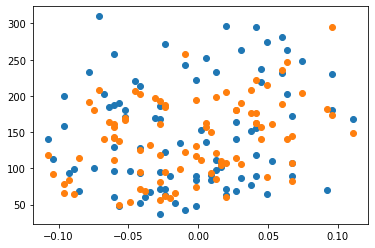

In [17]:
# Task 10: visualization
import matplotlib.pyplot as plt # get library

pred = model(X_test, W, b) # get prediction
plt.scatter(X_test[:, 0], y_test) # show test data
plt.scatter(X_test[:, 0], pred) #  show pred result

plt.show() # show the plot